In [47]:
################# SATURDAYSAI #################
### Importación de las librerías necesarias ###
###############################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

from pylab import rcParams

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
from collections import Counter

rcParams['figure.figsize'] = 14, 8.7 # Golden Mean
LABELS = ["1","2"]

from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

%matplotlib inline

In [48]:
### Importación de la Base de datos ###
file = "./EstudioPrevalencia2015.xlsx"
xl = pd.ExcelFile(file)

In [49]:
print(xl.sheet_names)

['Hoja1', 'BBDD fichero total', 'títulos y códigos']


In [50]:
df=xl.parse('BBDD fichero total')

In [51]:
# for column in df.columns:
#     print(str(column))
df.head(10)

,numero,modalidad,P0R1,P0B,POB1,P0B2,P0C,P0F1,POF2,POF3,...,DB4,DB5,DB6,DB6B,DB7,DB8,PESO,PESO1,revisadas_personales,revisadas_telefónicas
0,1006,1,9,4,4,32,1,1,1.0,2.0,...,4,2,2,NaN,1,3,1.128607,1.128607,NaN,NaN
1,1007,1,3,5,6,52,1,1,1.0,2.0,...,5,1,1,NaN,1,1,1.100234,1.100234,NaN,NaN
2,1008,1,4,5,8,67,2,1,1.0,2.0,...,100,4,5,NaN,1,4,1.196041,1.196041,NaN,NaN
3,1009,1,5,5,7,60,2,1,1.0,2.0,...,100,2,3,NaN,1,3,1.062141,1.062141,NaN,NaN
4,1010,1,5,5,6,51,2,1,1.0,2.0,...,5,2,3,NaN,1,3,1.062141,1.062141,NaN,1.0
5,1011,1,5,5,3,18,1,1,1.0,2.0,...,2,99,1,NaN,1,3,1.062141,1.062141,NaN,NaN
6,1012,1,5,5,4,27,2,1,1.0,1.0,...,4,1,1,NaN,1,3,0.720738,0.753777,NaN,NaN
7,1013,1,5,5,4,34,2,1,1.0,2.0,...,100,2,2,NaN,1,2,1.062141,1.062141,NaN,NaN
8,1014,1,5,5,7,62,1,1,2.0,NaN,...,100,2,3,NaN,1,2,1.062141,1.062141,NaN,NaN
9,1015,1,9,1,4,34,2,2,NaN,NaN,...,6,2,2,NaN,1,2,1.128607,1.128607,NaN,1.0


In [52]:
df.describe()

,numero,modalidad,P0R1,P0B,POB1,P0B2,P0C,P0F1,POF2,POF3,...,DB4,DB5,DB6,DB6B,DB7,DB8,PESO,PESO1,revisadas_personales,revisadas_telefónicas
count,6816.000000,6816.0,6816.000000,6816.000000,6816.000000,6816.000000,6816.000000,6816.000000,5202.000000,4669.000000,...,6816.000000,6816.000000,6816.000000,149.000000,6816.000000,6816.000000,6816.000000,6816.000000,660.0,1307.0
mean,4577.223738,1.0,8.456719,3.571156,5.777142,47.907864,1.516432,1.236796,1.102461,1.911544,...,39.057072,2.367811,2.843603,5.993289,1.098005,2.488116,1.050457,1.046409,1.0,1.0
std,2076.015852,0.0,4.826821,1.763138,1.626472,17.571003,0.499767,0.425147,0.303282,0.283987,...,46.042025,6.428943,6.887837,1.646030,2.087890,7.864340,0.181920,0.182712,0.0,0.0
min,1006.000000,1.0,1.000000,1.000000,3.000000,18.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,5.000000,1.000000,0.000000,0.175572,0.131613,1.0,1.0
25%,2777.750000,1.0,5.000000,2.000000,4.000000,34.000000,1.000000,1.000000,1.000000,2.000000,...,4.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.082998,1.082998,1.0,1.0
50%,4565.500000,1.0,9.000000,4.000000,6.000000,46.000000,2.000000,1.000000,1.000000,2.000000,...,5.000000,2.000000,2.000000,5.000000,1.000000,2.000000,1.107651,1.107651,1.0,1.0
75%,6359.250000,1.0,13.000000,5.000000,7.000000,62.000000,2.000000,1.000000,1.000000,2.000000,...,100.000000,2.000000,3.000000,7.000000,1.000000,3.000000,1.115778,1.115778,1.0,1.0
max,8240.000000,1.0,19.000000,6.000000,8.000000,95.000000,2.000000,2.000000,2.000000,2.000000,...,100.000000,100.000000,100.000000,16.000000,100.000000,100.000000,1.196041,1.196041,1.0,1.0


In [53]:
# Declaración de funciones para limpiar el Dataframe

def change_99_100(x):
    if (type(x) == int or type(x) == float) and x >= 99.0:
      return None
    else :
      return x

def change_column_P23(x):
    if (type(x) == int or type(x) == float) and x >= 2.0:
      return 2.0
    else :
      return x

def cleanDataset(df):
  print("Tamaño del dataframe antes de limpieza ", df.shape)

  new_df = df[df['P23'] <= 3]
  print("Eliminadas filas que no han contestado a la variable objetivo ", new_df.shape )

  new_df = new_df.apply(change_99_100)
  print("Eliminados los valores de 99 o 100", new_df.shape)

  new_df['P23'] = new_df['P23'].apply(change_column_P23)
  print("Unificados Valores de P23 2 y 3 en solo 2", new_df.shape)

  new_df = new_df.dropna(axis=1, how='any')
  print("Eliminadas todas las columnas con al menos un valor nulo", new_df.shape)

  new_df = new_df.drop(['numero', 'modalidad'],1)
  print("Eliminadas columnas que no aportan valor ", new_df.shape)

  return new_df

In [54]:
new_df = cleanDataset(df)
new_df.columns

Tamaño del dataframe antes de limpieza  (6816, 240)
Eliminadas filas que no han contestado a la variable objetivo  (5159, 240)
Eliminados los valores de 99 o 100 (5159, 240)
Unificados Valores de P23 2 y 3 en solo 2 (5159, 240)
Eliminadas todas las columnas con al menos un valor nulo (5159, 127)
Eliminadas columnas que no aportan valor  (5159, 125)


Index(['P0R1', 'P0B', 'POB1', 'P0B2', 'P0C', 'P0F1', 'POF2', 'P1P1A', 'P1P1B',
       'P1P1C',
       ...
       'DB0', 'DB1', 'DB3', 'DB4', 'DB5', 'DB6', 'DB7', 'DB8', 'PESO',
       'PESO1'],
      dtype='object', length=125)

In [55]:
### Número de valores únicos en cada columna ###
new_df.nunique()

P0R1     19
P0B       6
POB1      6
P0B2     76
P0C       2
         ..
DB6       8
DB7       2
DB8       8
PESO     58
PESO1    62
Length: 125, dtype: int64

In [56]:
new_df.columns

Index(['P0R1', 'P0B', 'POB1', 'P0B2', 'P0C', 'P0F1', 'POF2', 'P1P1A', 'P1P1B',
       'P1P1C',
       ...
       'DB0', 'DB1', 'DB3', 'DB4', 'DB5', 'DB6', 'DB7', 'DB8', 'PESO',
       'PESO1'],
      dtype='object', length=125)

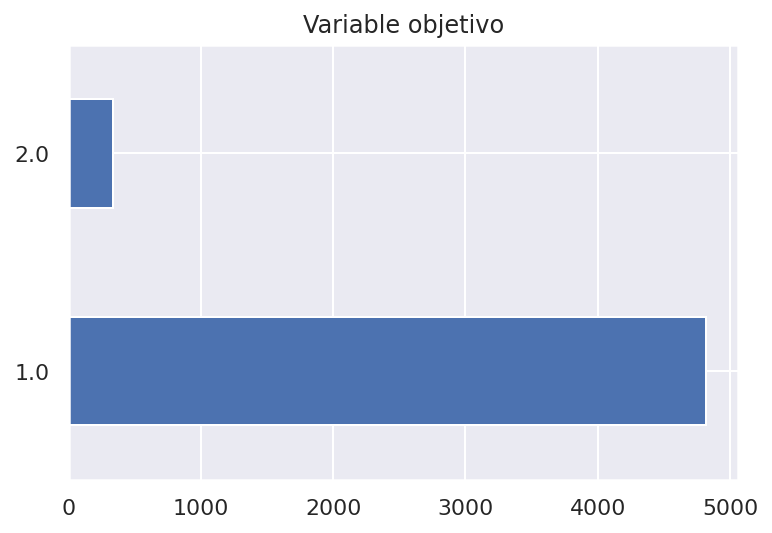

In [57]:
### Variable Objetivo ###
plot= new_df['P23'].value_counts().plot(kind='barh', title="Variable objetivo") 

In [58]:
### Tabla Variable objetivo - Comunidad autónoma ###
pd.crosstab(new_df['P23'], new_df['P0R1'], margins=True)


P0R1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,All
P23,,,,,,,,,,,,,,,,,,,,
1.0,1023,150,146,129,254,63,215,173,509,563,83,315,633,153,72,225,44,37,33,4820
2.0,33,7,5,3,19,1,33,14,36,31,5,20,77,6,4,24,16,1,4,339
All,1056,157,151,132,273,64,248,187,545,594,88,335,710,159,76,249,60,38,37,5159


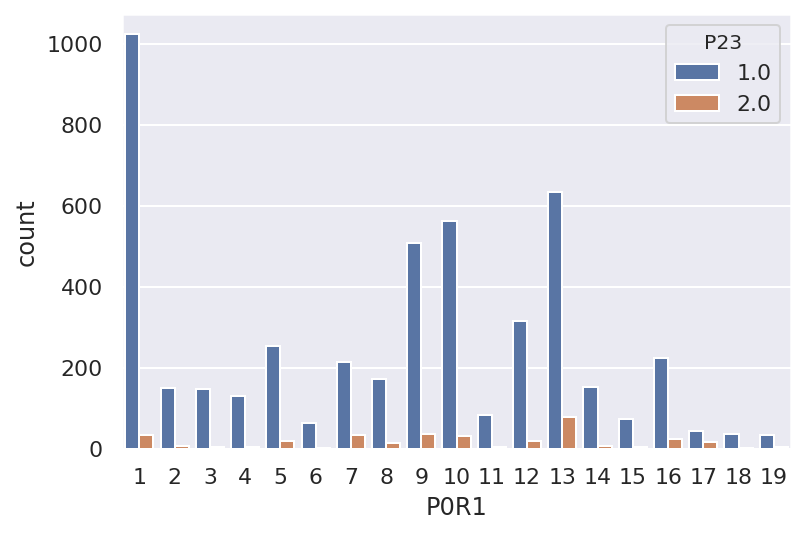

In [59]:
sns.set()
%config InlineBackend.figure_format='retina'
sns.countplot(x='P0R1', hue='P23', data=new_df);

In [60]:
new_df['P23'].unique()

array([1., 2.])

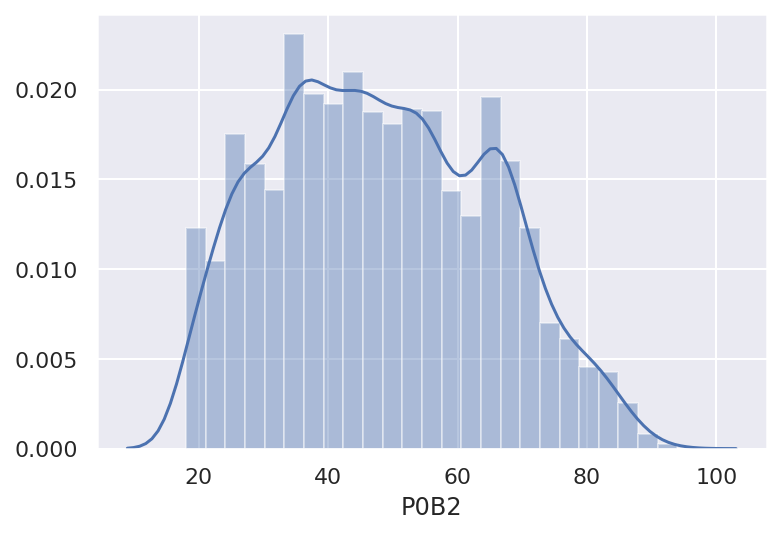

In [61]:
### Histograma de la edad ###
sns.distplot(new_df['P0B2'])

(array([193., 270., 325., 419., 779., 717., 876., 822., 579., 179.]),
 array([2.89037176, 3.05566406, 3.22095636, 3.38624867, 3.55154097,
        3.71683327, 3.88212557, 4.04741787, 4.21271018, 4.37800248,
        4.54329478]),
 <a list of 10 Patch objects>)

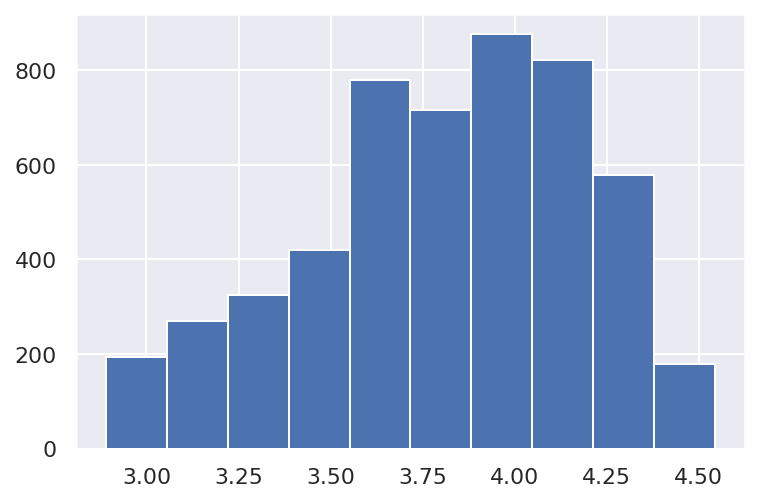

In [62]:
### Histograma ###
log_edad = np.log(new_df['P0B2'])
plt.hist(log_edad)

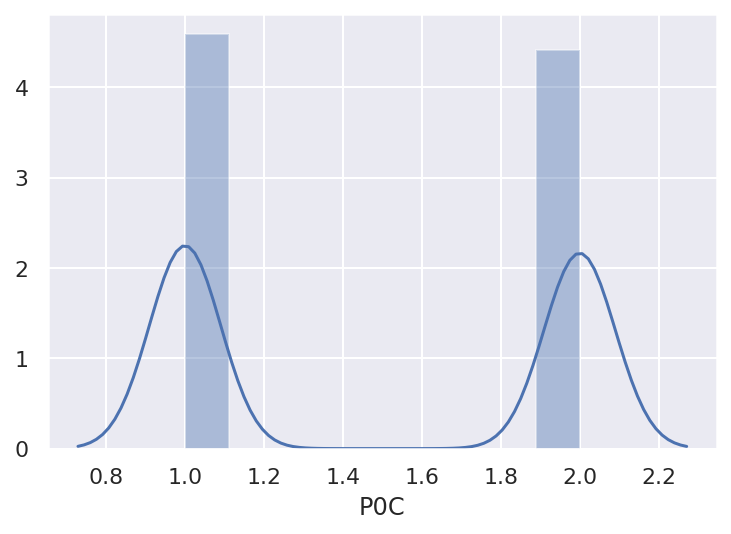

In [63]:
### Histograma del sexo ###
sns.distplot(new_df['P0C'])

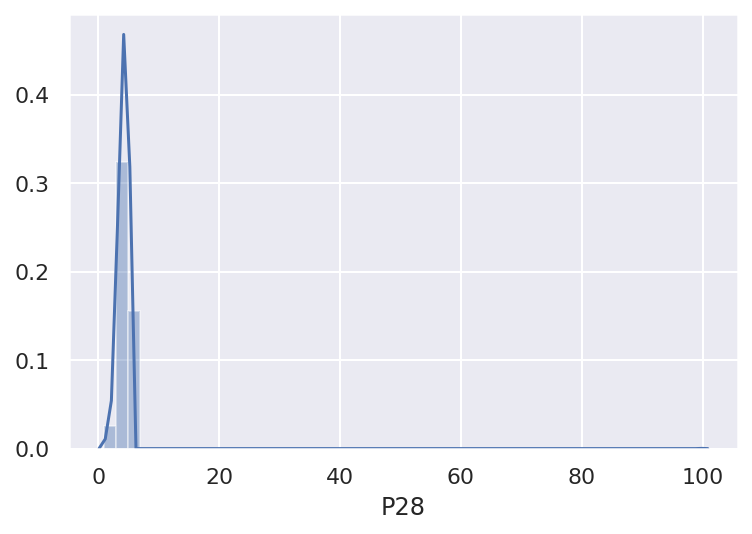

In [64]:
### Histograma Estado de Salud ###
sns.distplot(new_df['P28'])

In [68]:
print(*new_df.columns.to_list(), sep=', ')
# print(new_df.columns.to_list())

P0R1, P0B, POB1, P0B2, P0C, P0F1, POF2, P1P1A, P1P1B, P1P1C, P1P1D, P1P1E, P1P1F, P1P1G, P1P1H, P1P1I, P1P1J, P1P1K, P1P1L, P1P1M, P1P1N, P1P1O, P2P2A, P2P2B, P2P2C, P2P2D, P2P2E, P2P2F, P2P2G, P2P2H, P2P2I, P2P2J, P2P2K, P2P2L, P2P2M, P2P2N, P2P2O, P3, P4, P5, P6, P7, P8, P9, P11, P12A_1, P13, P14A1, P14A2, P14A3, P14A4, P14A5, P14A6, P14A7, P14A8, P14A9, P14A10, P14A11, P14A12, P14A13, P14A14, P14A15, P14A16, P14A17, P15A, P16A, P17P17A, P17P17B, P17P17C, P17P17D, P17P17E, P17P17F, P17P17G, P17P17H, P17P17I, P18A, P18B, P18C, P20, P21, P22, P23, P24, P25P25A, P25P25B, P25P25C, P25P25D, P25P25E, P25P25F, P25P25G, P25P25H, P25P25I, P25P25J, P26, P28, P29, P30, P31, P32, P33, P34, P35, P38SP1, P38SP2, P38SP3, P38SP4, P38SP5, P38SP6, P38SP7, P38SP8, P38SP9, P39, P41, P43, P46, DB0, DB1, DB3, DB4, DB5, DB6, DB7, DB8, PESO, PESO1


In [23]:
Datos=['P0R1', 'P0B', 'POB1', 'P0C', 'P46', 'DB0', 'DB1', 'DB3', 'DB4',  'DB5', 'DB6', 'DB7', 'DB8', 'P23']

In [24]:
new_df= new_df[Datos]
new_df.head()

,P0R1,P0B,POB1,P0C,P46,DB0,DB1,DB3,DB4,DB5,DB6,DB7,DB8,P23
0,9,4,4,1,7,4,2,1,4,2,2,1,3,1.0
1,3,5,6,1,8,3,4,5,5,1,1,1,1,1.0
2,4,5,8,2,9,2,4,100,100,4,5,1,4,1.0
3,5,5,7,2,11,3,1,100,100,2,3,1,3,1.0
4,5,5,6,2,9,3,1,3,5,2,3,1,3,1.0


In [25]:
new_df.shape

(5159, 14)

In [26]:
new_df.dtypes

P0R1      int64
P0B       int64
POB1      int64
P0C       int64
P46       int64
DB0       int64
DB1       int64
DB3       int64
DB4       int64
DB5       int64
DB6       int64
DB7       int64
DB8       int64
P23     float64
dtype: object

In [27]:
new_df.isnull().sum()

P0R1    0
P0B     0
POB1    0
P0C     0
P46     0
DB0     0
DB1     0
DB3     0
DB4     0
DB5     0
DB6     0
DB7     0
DB8     0
P23     0
dtype: int64

In [28]:
new_df=new_df.dropna()

In [29]:
new_df.describe()

,P0R1,P0B,POB1,P0C,P46,DB0,DB1,DB3,DB4,DB5,DB6,DB7,DB8,P23
count,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000
mean,8.170576,3.560380,5.830393,1.490599,8.680364,2.895910,2.659624,25.786393,33.153324,2.328552,2.825160,1.041481,2.353557,1.065710
std,5.048003,1.758982,1.568310,0.499960,3.938258,2.830794,6.139870,41.104046,43.922112,5.984180,6.473831,0.199419,7.049362,0.247799
min,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,3.000000,2.000000,5.000000,1.000000,8.000000,2.000000,1.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,9.000000,4.000000,6.000000,1.000000,9.000000,3.000000,1.000000,4.000000,5.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,13.000000,5.000000,7.000000,2.000000,10.000000,3.000000,4.000000,5.000000,99.000000,2.000000,3.000000,1.000000,3.000000,1.000000
max,19.000000,6.000000,8.000000,2.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,2.000000,100.000000,2.000000


,P0R1,P0B,POB1,P0C,P46,DB0,DB1,DB3,DB4,DB5,DB6,DB7,DB8,P23
P0R1,1.000000,0.081504,0.007794,-0.028402,-0.022115,0.017116,-0.006708,0.103939,0.120185,0.010942,-0.019756,0.061147,0.000958,0.088680
P0B,0.081504,1.000000,0.019631,0.000150,-0.021996,0.039128,0.012656,0.029350,0.053335,-0.003165,-0.003295,0.012203,-0.017263,0.002683
POB1,0.007794,0.019631,1.000000,0.074493,-0.048079,-0.123370,0.128538,0.065753,-0.023110,0.072746,0.130784,-0.086602,-0.044185,-0.005240
P0C,-0.028402,0.000150,0.074493,1.000000,-0.000296,-0.020212,0.046831,-0.024334,-0.019600,0.022125,0.003685,-0.003866,-0.022105,-0.044307
P46,-0.022115,-0.021996,-0.048079,-0.000296,1.000000,0.016944,-0.019365,0.035614,0.025496,-0.002511,-0.011219,-0.017921,-0.002039,-0.026351
DB0,0.017116,0.039128,-0.123370,-0.020212,0.016944,1.000000,0.394382,0.068863,0.060531,0.104060,0.077969,0.007994,0.100582,-0.007936
DB1,-0.006708,0.012656,0.128538,0.046831,-0.019365,0.394382,1.000000,0.064724,0.058387,0.259144,0.295197,-0.010159,0.244412,0.035601
DB3,0.103939,0.029350,0.065753,-0.024334,0.035614,0.068863,0.064724,1.000000,0.839886,0.063551,0.061164,-0.022784,0.081716,0.020869
DB4,0.120185,0.053335,-0.023110,-0.019600,0.025496,0.060531,0.058387,0.839886,1.000000,0.045897,0.042181,-0.003073,0.088158,0.023264
DB5,0.010942,-0.003165,0.072746,0.022125,-0.002511,0.104060,0.259144,0.063551,0.045897,1.000000,0.485629,0.000275,0.432820,0.019169


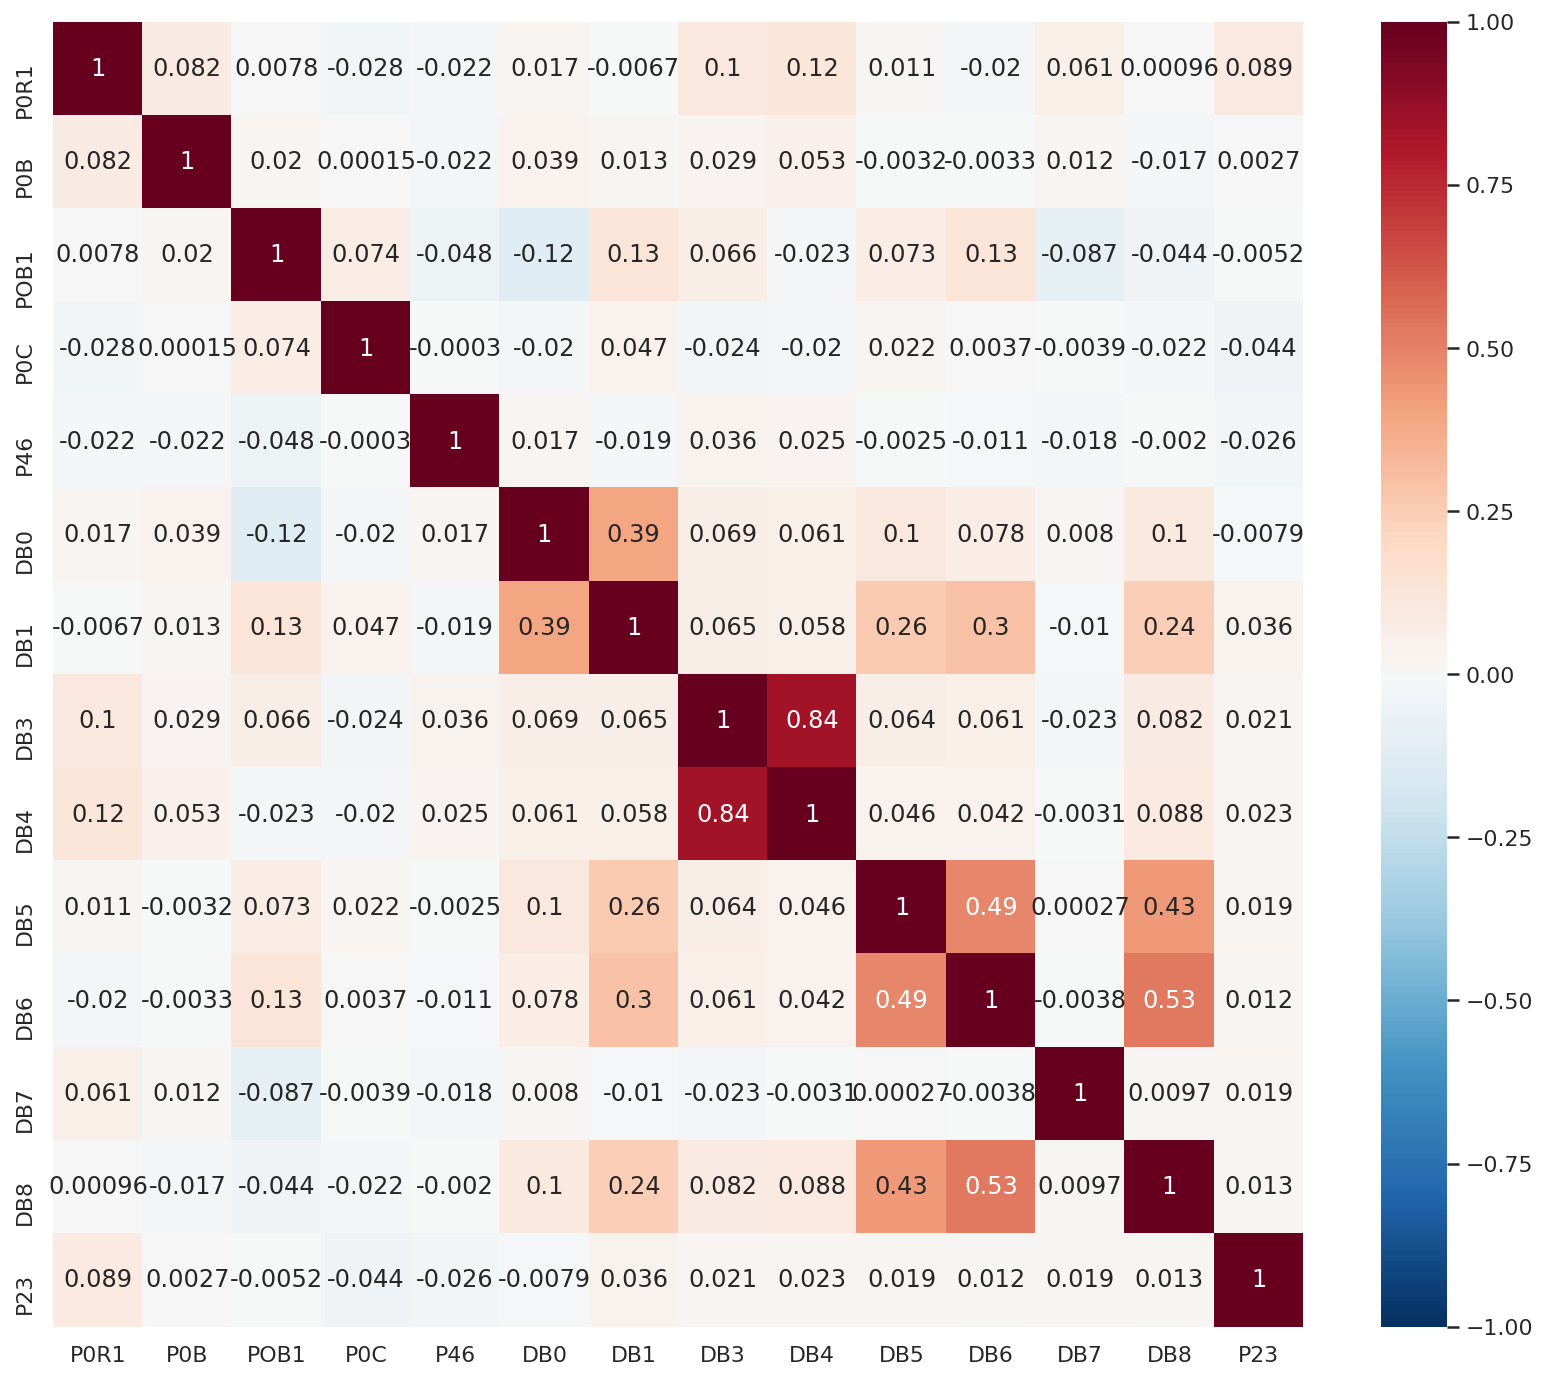

In [30]:
### Relaciones entre las features ###
correlation = new_df.corr()
display(correlation)
plt.figure(figsize=(14, 12))
import seaborn as sns
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [31]:
new_df["P23"].value_counts()

1.0    4820
2.0     339
Name: P23, dtype: int64

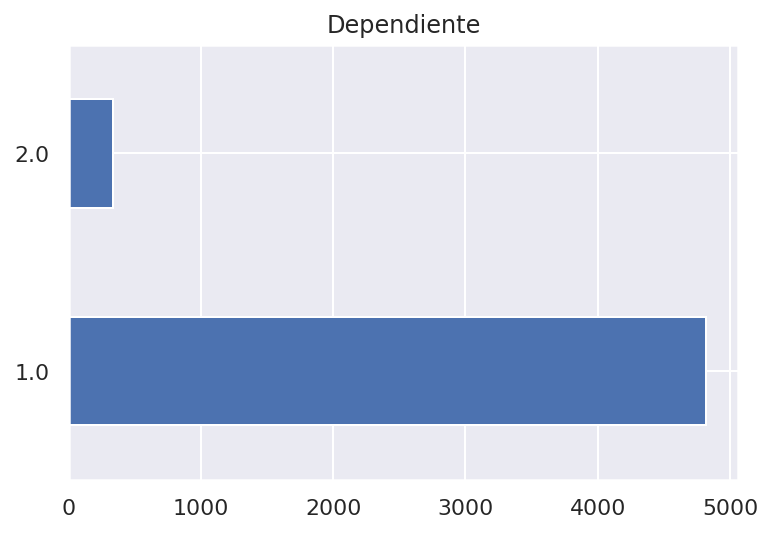

In [32]:
plot= new_df["P23"].value_counts().plot(kind='barh', title="Dependiente") 

In [33]:
y = new_df['P23']
X = new_df.drop('P23', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [34]:
predictores= X_train.columns.tolist()

In [35]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))
    
def run_model(X_train, X_test, y_train, y_test):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base
 
model = run_model(X_train, X_test, y_train, y_test)
    

In [72]:
### Random Forest Classifier ###
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

def get_mae_rf(num_est, predictors_train, predictors_val, targ_train, targ_val):
    
    # fitting model with input max_leaf_nodes
    model = RandomForestClassifier(n_estimators=num_est, random_state=0,  bootstrap = True,verbose=2,
                               max_features = 'sqrt')

    # fitting the model with training dataset
    model.fit(predictors_train, targ_train)

    # making prediction with the test dataset
    preds_val = model.predict(predictors_val)

    # calculate and return the MAE
    mae = mean_absolute_error(targ_val, preds_val)
    return(mae)

In [73]:
plot_mae = {}
for num_est  in range(2,50):
    my_mae = get_mae_rf(num_est,X_train,X_test,y_train,y_test)
    plot_mae[num_est] = my_mae

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

building tree 1 of 2
building tree 2 of 2
building tree 1 of 3
building tree 2 of 3
building tree 3 of 3
building tree 1 of 4
building tree 2 of 4
building tree 3 of 4
building tree 4 of 4
building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5
building tree 1 of 6
building tree 2 of 6
building tree 3 of 6
building tree 4 of 6
building tree 5 of 6
building tree 6 of 6
building tree 1 of 7
building tree 2 of 7
building tree 3 of 7
building tree 4 of 7
building tree 5 of 7
building tree 6 of 7
building tree 7 of 7
building tree 1 of 8
building tree 2 of 8
building tree 3 of 8
building tree 4 of 8
building tree 5 of 8
building tree 6 of 8
building tree 7 of 8
building tree 8 of 8
building tree 1 of 9


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

building tree 2 of 9
building tree 3 of 9
building tree 4 of 9
building tree 5 of 9
building tree 6 of 9
building tree 7 of 9
building tree 8 of 9
building tree 9 of 9
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
building tree 1 of 11
building tree 2 of 11
building tree 3 of 11
building tree 4 of 11
building tree 5 of 11
building tree 6 of 11
building tree 7 of 11
building tree 8 of 11
building tree 9 of 11
building tree 10 of 11
building tree 11 of 11
building tree 1 of 12
building tree 2 of 12
building tree 3 of 12
building tree 4 of 12
building tree 5 of 12
building tree 6 of 12
building tree 7 of 12
building tree 8 of 12
building tree 9 of 12
building tree 10 of 12
building tree 11 of 12
building tree 12 of 12


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished
[Paral

building tree 1 of 13
building tree 2 of 13
building tree 3 of 13
building tree 4 of 13
building tree 5 of 13
building tree 6 of 13
building tree 7 of 13
building tree 8 of 13
building tree 9 of 13
building tree 10 of 13
building tree 11 of 13
building tree 12 of 13
building tree 13 of 13
building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14
building tree 1 of 15
building tree 2 of 15
building tree 3 of 15
building tree 4 of 15
building tree 5 of 15
building tree 6 of 15
building tree 7 of 15
building tree 8 of 15
building tree 9 of 15
building tree 10 of 15
building tree 11 of 15
building tree 12 of 15
building tree 13 of 15
building tree 14 of 15
building tree 15 of 15


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.1s finished
[Paral

building tree 1 of 16
building tree 2 of 16
building tree 3 of 16
building tree 4 of 16
building tree 5 of 16
building tree 6 of 16
building tree 7 of 16
building tree 8 of 16
building tree 9 of 16
building tree 10 of 16
building tree 11 of 16
building tree 12 of 16
building tree 13 of 16
building tree 14 of 16
building tree 15 of 16
building tree 16 of 16
building tree 1 of 17
building tree 2 of 17
building tree 3 of 17
building tree 4 of 17
building tree 5 of 17
building tree 6 of 17
building tree 7 of 17
building tree 8 of 17
building tree 9 of 17
building tree 10 of 17
building tree 11 of 17
building tree 12 of 17
building tree 13 of 17
building tree 14 of 17
building tree 15 of 17
building tree 16 of 17
building tree 17 of 17
building tree 1 of 18
building tree 2 of 18
building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 1

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Paral

building tree 1 of 19
building tree 2 of 19
building tree 3 of 19
building tree 4 of 19
building tree 5 of 19
building tree 6 of 19
building tree 7 of 19
building tree 8 of 19
building tree 9 of 19
building tree 10 of 19
building tree 11 of 19
building tree 12 of 19
building tree 13 of 19
building tree 14 of 19
building tree 15 of 19
building tree 16 of 19
building tree 17 of 19
building tree 18 of 19
building tree 19 of 19
building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20
building tree 1 of 21
building tree 2 of 21
building tree 3 of 21
building tree 4 of 21
building tree 5 of 21
building tr

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23
building tree 1 of 24
building tree 2 of 24
building tree 3 of 24
building tree 4 of 24
building tree 5 of 24
building tree 6 of 24
building tree 7 of 24
building tree 8 of 24
building tree 9 of 24
building tree 10 of 24
building tree 11 of 24
building tree 12 of 24
building tree 13 of 24


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 14 of 24
building tree 15 of 24
building tree 16 of 24
building tree 17 of 24
building tree 18 of 24
building tree 19 of 24
building tree 20 of 24
building tree 21 of 24
building tree 22 of 24
building tree 23 of 24
building tree 24 of 24
building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25
building tree 1 of 26
building tree 2 of 26
building tree 3 of 26
building tree 4 of 26
building tree 5 of 26
building tree 6 of 26
building tree 7 of 26
building tree 8 of 26
build

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 13 of 26
building tree 14 of 26
building tree 15 of 26
building tree 16 of 26
building tree 17 of 26
building tree 18 of 26
building tree 19 of 26
building tree 20 of 26
building tree 21 of 26
building tree 22 of 26
building tree 23 of 26
building tree 24 of 26
building tree 25 of 26
building tree 26 of 26
building tree 1 of 27
building tree 2 of 27
building tree 3 of 27
building tree 4 of 27
building tree 5 of 27
building tree 6 of 27
building tree 7 of 27
building tree 8 of 27
building tree 9 of 27
building tree 10 of 27
building tree 11 of 27
building tree 12 of 27
building tree 13 of 27
building tree 14 of 27
building tree 15 of 27
building tree 16 of 27
building tree 17 of 27
building tree 18 of 27
building tree 19 of 27
building tree 20 of 27
building tree 21 of 27
building tree 22 of 27
building tree 23 of 27
building tree 24 of 27
building tree 25 of 27
building tree 26 of 27
building tree 27 of 27


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 28
building tree 2 of 28
building tree 3 of 28
building tree 4 of 28
building tree 5 of 28
building tree 6 of 28
building tree 7 of 28
building tree 8 of 28
building tree 9 of 28
building tree 10 of 28
building tree 11 of 28
building tree 12 of 28
building tree 13 of 28
building tree 14 of 28
building tree 15 of 28
building tree 16 of 28
building tree 17 of 28
building tree 18 of 28
building tree 19 of 28
building tree 20 of 28
building tree 21 of 28
building tree 22 of 28
building tree 23 of 28
building tree 24 of 28
building tree 25 of 28
building tree 26 of 28
building tree 27 of 28
building tree 28 of 28
building tree 1 of 29
building tree 2 of 29
building tree 3 of 29
building tree 4 of 29
building tree 5 of 29
building tree 6 of 29
building tree 7 of 29
building tree 8 of 29
building tree 9 of 29
building tree 10 of 29
building tree 11 of 29
building tree 12 of 29
building tree 13 of 29
building tree 14 of 29
building tree 15 of 29
building tree 16 of 29
buildi

[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 11 of 31
building tree 12 of 31
building tree 13 of 31
building tree 14 of 31
building tree 15 of 31
building tree 16 of 31
building tree 17 of 31
building tree 18 of 31
building tree 19 of 31
building tree 20 of 31
building tree 21 of 31
building tree 22 of 31
building tree 23 of 31
building tree 24 of 31
building tree 25 of 31
building tree 26 of 31
building tree 27 of 31
building tree 28 of 31
building tree 29 of 31
building tree 30 of 31
building tree 31 of 31
building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 

[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 31 of 32
building tree 32 of 32
building tree 1 of 33
building tree 2 of 33
building tree 3 of 33
building tree 4 of 33
building tree 5 of 33
building tree 6 of 33
building tree 7 of 33
building tree 8 of 33
building tree 9 of 33
building tree 10 of 33
building tree 11 of 33
building tree 12 of 33
building tree 13 of 33
building tree 14 of 33
building tree 15 of 33
building tree 16 of 33
building tree 17 of 33
building tree 18 of 33
building tree 19 of 33
building tree 20 of 33
building tree 21 of 33
building tree 22 of 33
building tree 23 of 33
building tree 24 of 33
building tree 25 of 33
building tree 26 of 33
building tree 27 of 33
building tree 28 of 33
building tree 29 of 33
building tree 30 of 33
building tree 31 of 33
building tree 32 of 33
building tree 33 of 33


[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 34
building tree 2 of 34
building tree 3 of 34
building tree 4 of 34
building tree 5 of 34
building tree 6 of 34
building tree 7 of 34
building tree 8 of 34
building tree 9 of 34
building tree 10 of 34
building tree 11 of 34
building tree 12 of 34
building tree 13 of 34
building tree 14 of 34
building tree 15 of 34
building tree 16 of 34
building tree 17 of 34
building tree 18 of 34
building tree 19 of 34
building tree 20 of 34
building tree 21 of 34
building tree 22 of 34
building tree 23 of 34
building tree 24 of 34
building tree 25 of 34
building tree 26 of 34
building tree 27 of 34
building tree 28 of 34
building tree 29 of 34
building tree 30 of 34
building tree 31 of 34
building tree 32 of 34
building tree 33 of 34
building tree 34 of 34
building tree 1 of 35
building tree 2 of 35
building tree 3 of 35
building tree 4 of 35
building tree 5 of 35
building tree 6 of 35
building tree 7 of 35
building tree 8 of 35
building tree 9 of 35
building tree 10 of 35
buildi

[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 25 of 35
building tree 26 of 35
building tree 27 of 35
building tree 28 of 35
building tree 29 of 35
building tree 30 of 35
building tree 31 of 35
building tree 32 of 35
building tree 33 of 35
building tree 34 of 35
building tree 35 of 35
building tree 1 of 36
building tree 2 of 36
building tree 3 of 36
building tree 4 of 36
building tree 5 of 36
building tree 6 of 36
building tree 7 of 36
building tree 8 of 36
building tree 9 of 36
building tree 10 of 36
building tree 11 of 36
building tree 12 of 36
building tree 13 of 36
building tree 14 of 36
building tree 15 of 36
building tree 16 of 36
building tree 17 of 36
building tree 18 of 36
building tree 19 of 36
building tree 20 of 36
building tree 21 of 36


[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 22 of 36
building tree 23 of 36
building tree 24 of 36
building tree 25 of 36
building tree 26 of 36
building tree 27 of 36
building tree 28 of 36
building tree 29 of 36
building tree 30 of 36
building tree 31 of 36
building tree 32 of 36
building tree 33 of 36
building tree 34 of 36
building tree 35 of 36
building tree 36 of 36
building tree 1 of 37
building tree 2 of 37
building tree 3 of 37
building tree 4 of 37
building tree 5 of 37
building tree 6 of 37
building tree 7 of 37
building tree 8 of 37
building tree 9 of 37
building tree 10 of 37
building tree 11 of 37
building tree 12 of 37
building tree 13 of 37
building tree 14 of 37
building tree 15 of 37


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 16 of 37
building tree 17 of 37
building tree 18 of 37
building tree 19 of 37
building tree 20 of 37
building tree 21 of 37
building tree 22 of 37
building tree 23 of 37
building tree 24 of 37
building tree 25 of 37
building tree 26 of 37
building tree 27 of 37
building tree 28 of 37
building tree 29 of 37
building tree 30 of 37
building tree 31 of 37
building tree 32 of 37
building tree 33 of 37
building tree 34 of 37
building tree 35 of 37
building tree 36 of 37
building tree 37 of 37
building tree 1 of 38
building tree 2 of 38
building tree 3 of 38
building tree 4 of 38
building tree 5 of 38
building tree 6 of 38
building tree 7 of 38
building tree 8 of 38
building tree 9 of 38
building tree 10 of 38
building tree 11 of 38
building tree 12 of 38
building tree 13 of 38
building tree 14 of 38
building tree 15 of 38
building tree 16 of 38
building tree 17 of 38
building tree 18 of 38
building tree 19 of 38
building tree 20 of 38
building tree 21 of 38
building tree 22 of 

[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 27 of 38
building tree 28 of 38
building tree 29 of 38
building tree 30 of 38
building tree 31 of 38
building tree 32 of 38
building tree 33 of 38
building tree 34 of 38
building tree 35 of 38
building tree 36 of 38
building tree 37 of 38
building tree 38 of 38
building tree 1 of 39
building tree 2 of 39
building tree 3 of 39
building tree 4 of 39
building tree 5 of 39
building tree 6 of 39
building tree 7 of 39
building tree 8 of 39
building tree 9 of 39
building tree 10 of 39
building tree 11 of 39
building tree 12 of 39
building tree 13 of 39
building tree 14 of 39
building tree 15 of 39
building tree 16 of 39
building tree 17 of 39
building tree 18 of 39
building tree 19 of 39
building tree 20 of 39
building tree 21 of 39
building tree 22 of 39
building tree 23 of 39
building tree 24 of 39
building tree 25 of 39
building tree 26 of 39
building tree 27 of 39
building tree 28 of 39
building tree 29 of 39
building tree 30 of 39
building tree 31 of 39
building tree 32 of 

[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41
building tree 1 of 42
building tree 2 of 42
building tree 3 of 42


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    0.0s finished


building tree 9 of 42
building tree 10 of 42
building tree 11 of 42
building tree 12 of 42
building tree 13 of 42
building tree 14 of 42
building tree 15 of 42
building tree 16 of 42
building tree 17 of 42
building tree 18 of 42
building tree 19 of 42
building tree 20 of 42
building tree 21 of 42
building tree 22 of 42
building tree 23 of 42
building tree 24 of 42
building tree 25 of 42
building tree 26 of 42
building tree 27 of 42
building tree 28 of 42
building tree 29 of 42
building tree 30 of 42
building tree 31 of 42
building tree 32 of 42
building tree 33 of 42
building tree 34 of 42
building tree 35 of 42
building tree 36 of 42
building tree 37 of 42
building tree 38 of 42
building tree 39 of 42
building tree 40 of 42
building tree 41 of 42
building tree 42 of 42
building tree 1 of 43
building tree 2 of 43
building tree 3 of 43
building tree 4 of 43
building tree 5 of 43
building tree 6 of 43
building tree 7 of 43
building tree 8 of 43
building tree 9 of 43
building tree 10 of 4

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 18 of 43
building tree 19 of 43
building tree 20 of 43
building tree 21 of 43
building tree 22 of 43
building tree 23 of 43
building tree 24 of 43
building tree 25 of 43
building tree 26 of 43
building tree 27 of 43
building tree 28 of 43
building tree 29 of 43
building tree 30 of 43
building tree 31 of 43
building tree 32 of 43
building tree 33 of 43
building tree 34 of 43
building tree 35 of 43
building tree 36 of 43
building tree 37 of 43
building tree 38 of 43
building tree 39 of 43
building tree 40 of 43
building tree 41 of 43
building tree 42 of 43
building tree 43 of 43
building tree 1 of 44
building tree 2 of 44
building tree 3 of 44
building tree 4 of 44
building tree 5 of 44
building tree 6 of 44
building tree 7 of 44
building tree 8 of 44
building tree 9 of 44
building tree 10 of 44
building tree 11 of 44
building tree 12 of 44
building tree 13 of 44
building tree 14 of 44
building tree 15 of 44
building tree 16 of 44
building tree 17 of 44
building tree 18 of 

[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45
building tree 1 of 46
building tree 2 of 46
building tree 3 of 46
building tree 4 of 46
building tree 5 of 46
building tree 6 of 46
building tree 7 of 46
building tree 8 of 46
building tree 9 of 46
building tree 10 of 46
building tree 11 of 46
building tree 12 of 46
building tree 13 of 46
building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46
building tree 18 of 46
building tree 19 of 46
building tree 20 of 46
building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46
building tree 26 of 

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46
building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46
building tree 44 of 46
building tree 45 of 46
building tree 46 of 46
building tree 1 of 47
building tree 2 of 47
building tree 3 of 47
building tree 4 of 47
building tree 5 of 47
building tree 6 of 47
building tree 7 of 47
building tree 8 of 47
building tree 9 of 47
building tree 10 of 47
building tree 11 of 47
building tree 12 of 47
building tree 13 of 47
building tree 14 of 47
building tree 15 of 47
building tree 16 of 47
building tree 17 of 47
building tree 18 of 47
building tree 19 of 47
building tree 20 of 47
building tree 21 of 47
building tree 22 of 47
building tree 23 of 47
building tree 24 of 47
building tree 25 of 47


[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 26 of 47
building tree 27 of 47
building tree 28 of 47
building tree 29 of 47
building tree 30 of 47
building tree 31 of 47
building tree 32 of 47
building tree 33 of 47
building tree 34 of 47
building tree 35 of 47
building tree 36 of 47
building tree 37 of 47
building tree 38 of 47
building tree 39 of 47
building tree 40 of 47
building tree 41 of 47
building tree 42 of 47
building tree 43 of 47
building tree 44 of 47
building tree 45 of 47
building tree 46 of 47
building tree 47 of 47
building tree 1 of 48
building tree 2 of 48
building tree 3 of 48
building tree 4 of 48
building tree 5 of 48
building tree 6 of 48
building tree 7 of 48
building tree 8 of 48
building tree 9 of 48
building tree 10 of 48
building tree 11 of 48
building tree 12 of 48
building tree 13 of 48
building tree 14 of 48
building tree 15 of 48
building tree 16 of 48
building tree 17 of 48
building tree 18 of 48
building tree 19 of 48
building tree 20 of 48
building tree 21 of 48
building tree 22 of 

[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 24 of 48
building tree 25 of 48
building tree 26 of 48
building tree 27 of 48
building tree 28 of 48
building tree 29 of 48
building tree 30 of 48
building tree 31 of 48
building tree 32 of 48
building tree 33 of 48
building tree 34 of 48
building tree 35 of 48
building tree 36 of 48
building tree 37 of 48
building tree 38 of 48
building tree 39 of 48
building tree 40 of 48
building tree 41 of 48
building tree 42 of 48
building tree 43 of 48
building tree 44 of 48
building tree 45 of 48
building tree 46 of 48
building tree 47 of 48
building tree 48 of 48
building tree 1 of 49
building tree 2 of 49
building tree 3 of 49
building tree 4 of 49
building tree 5 of 49
building tree 6 of 49
building tree 7 of 49
building tree 8 of 49
building tree 9 of 49
building tree 10 of 49
building tree 11 of 49
building tree 12 of 49
building tree 13 of 49
building tree 14 of 49
building tree 15 of 49
building tree 16 of 49
building tree 17 of 49


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 18 of 49
building tree 19 of 49
building tree 20 of 49
building tree 21 of 49
building tree 22 of 49
building tree 23 of 49
building tree 24 of 49
building tree 25 of 49
building tree 26 of 49
building tree 27 of 49
building tree 28 of 49
building tree 29 of 49
building tree 30 of 49
building tree 31 of 49
building tree 32 of 49
building tree 33 of 49
building tree 34 of 49
building tree 35 of 49
building tree 36 of 49
building tree 37 of 49
building tree 38 of 49
building tree 39 of 49
building tree 40 of 49
building tree 41 of 49
building tree 42 of 49
building tree 43 of 49
building tree 44 of 49
building tree 45 of 49
building tree 46 of 49
building tree 47 of 49
building tree 48 of 49
building tree 49 of 49


[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    0.0s finished


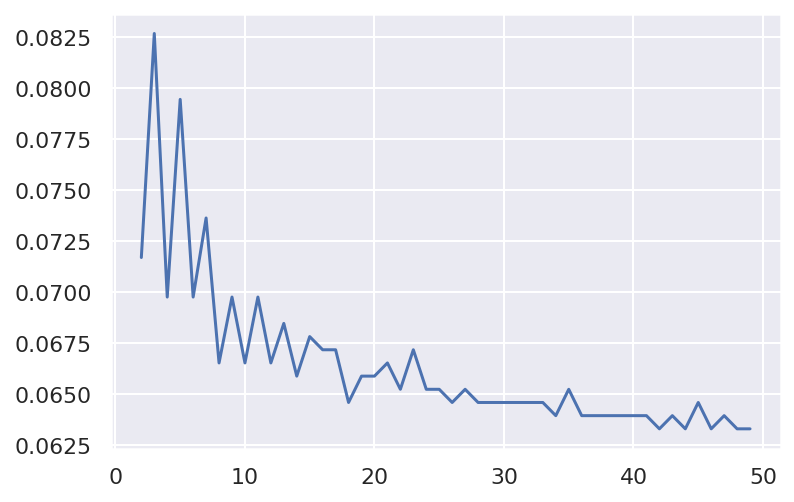

In [74]:
plt.plot(list(plot_mae.keys()),list(plot_mae.values()))
plt.show()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


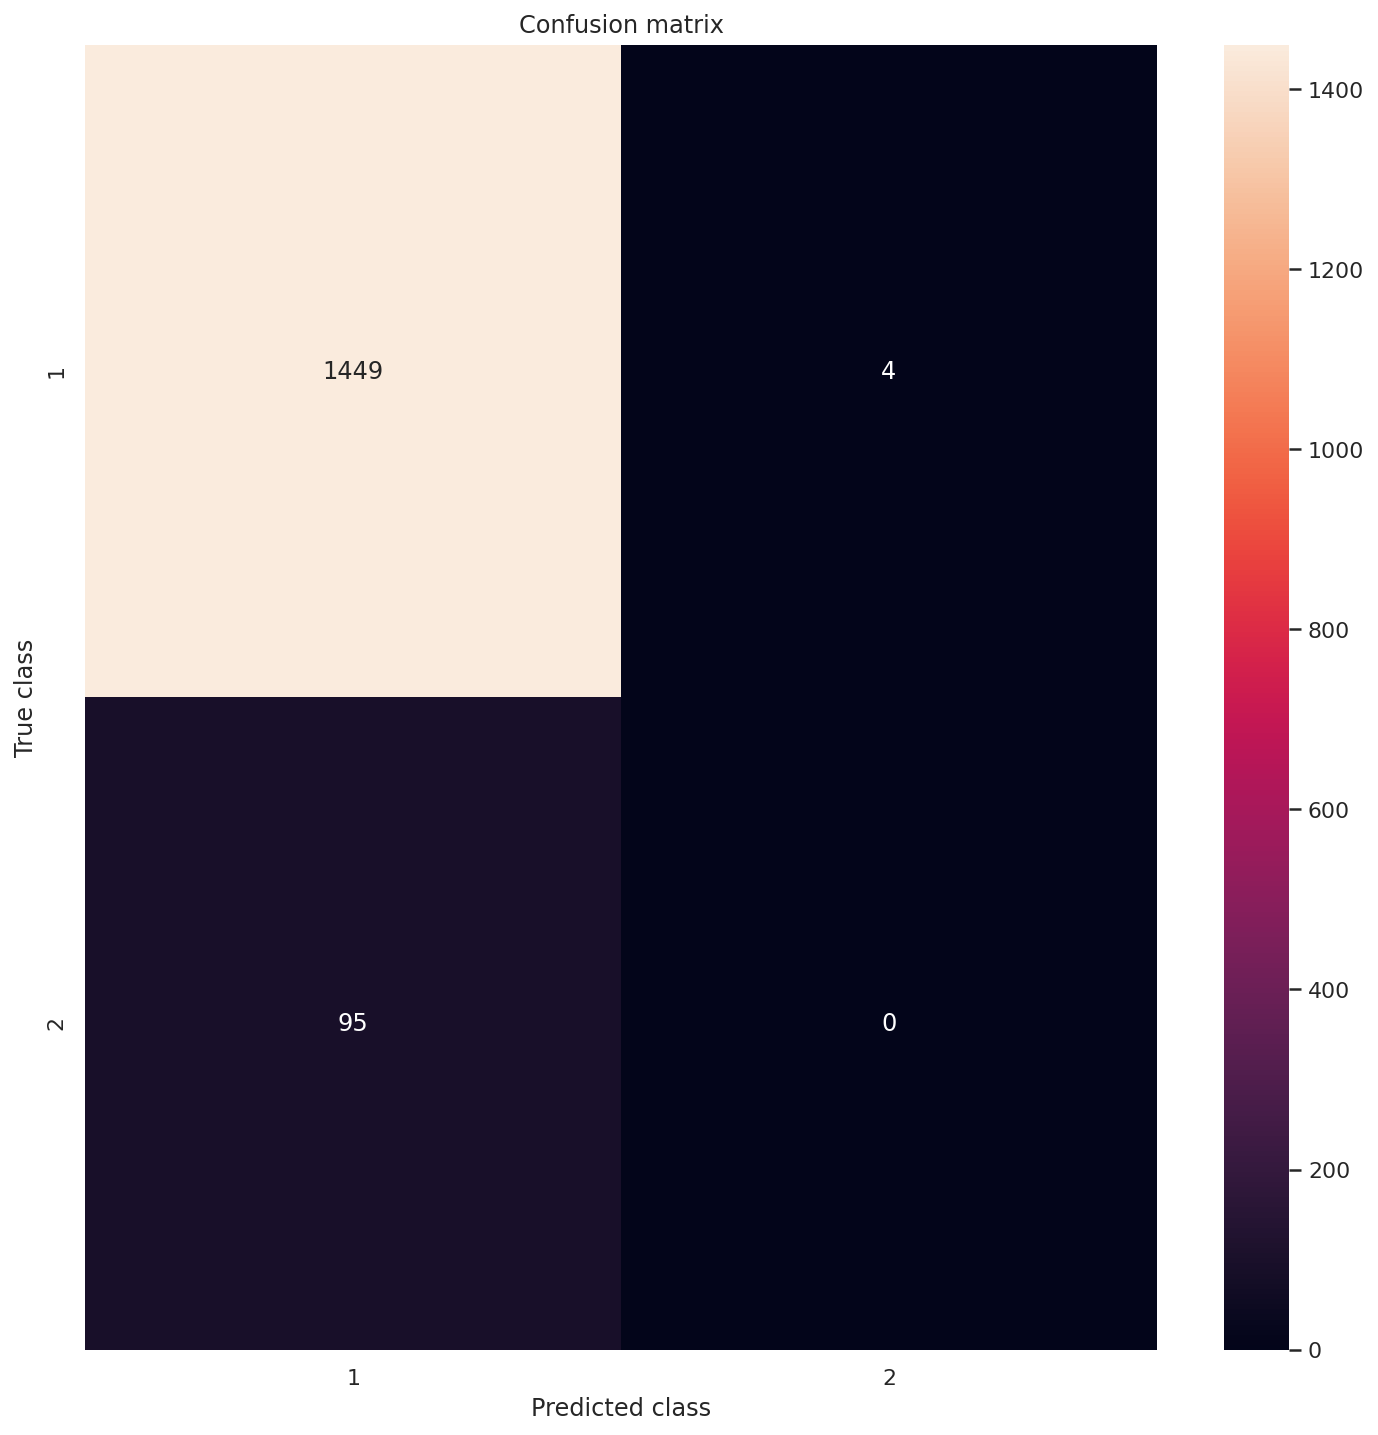

              precision    recall  f1-score   support

         1.0       0.94      1.00      0.97      1453
         2.0       0.00      0.00      0.00        95

    accuracy                           0.94      1548
   macro avg       0.47      0.50      0.48      1548
weighted avg       0.88      0.94      0.91      1548



In [37]:
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

In [38]:
### Balanceo SMOTE ###

os_us = SMOTETomek()
X_train_res, y_train_res = os_us.fit_sample(X_train, y_train)

print ("Distribution of class labels before resampling {}".format(Counter(y_train)))
print ("Distribution of class labels after resampling {}".format(Counter(y_train_res)))

Distribution of class labels before resampling Counter({1.0: 3367, 2.0: 244})
Distribution of class labels after resampling Counter({1.0: 3335, 2.0: 3335})


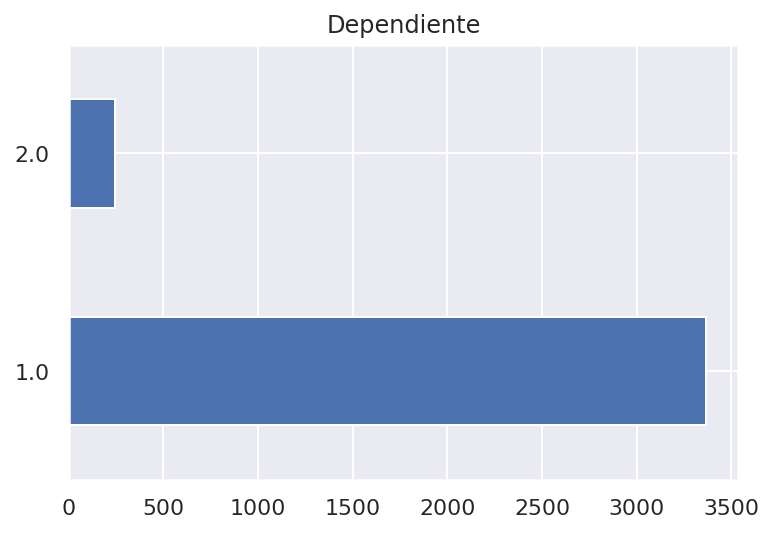

In [43]:
plot= y_train.value_counts().plot(kind='barh', title="Dependiente") 

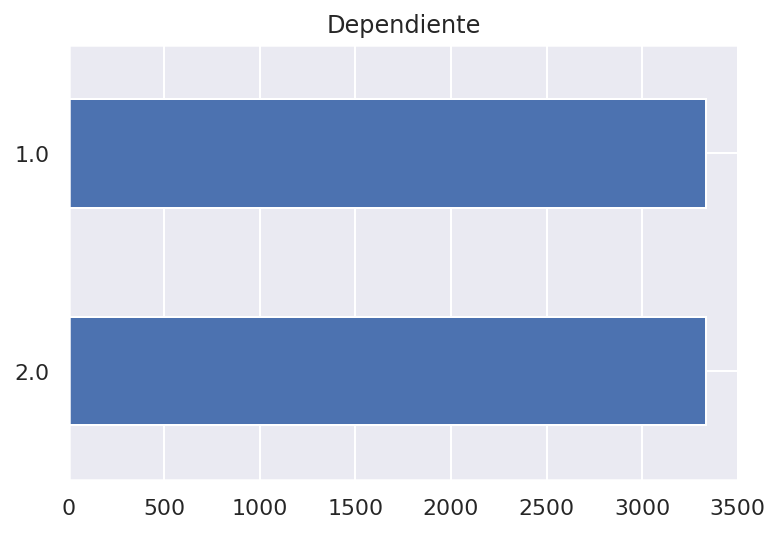

In [44]:
plot= y_train_res.value_counts().plot(kind='barh', title="Dependiente") 

In [39]:
model = run_model(X_train_res, X_test, y_train_res, y_test)

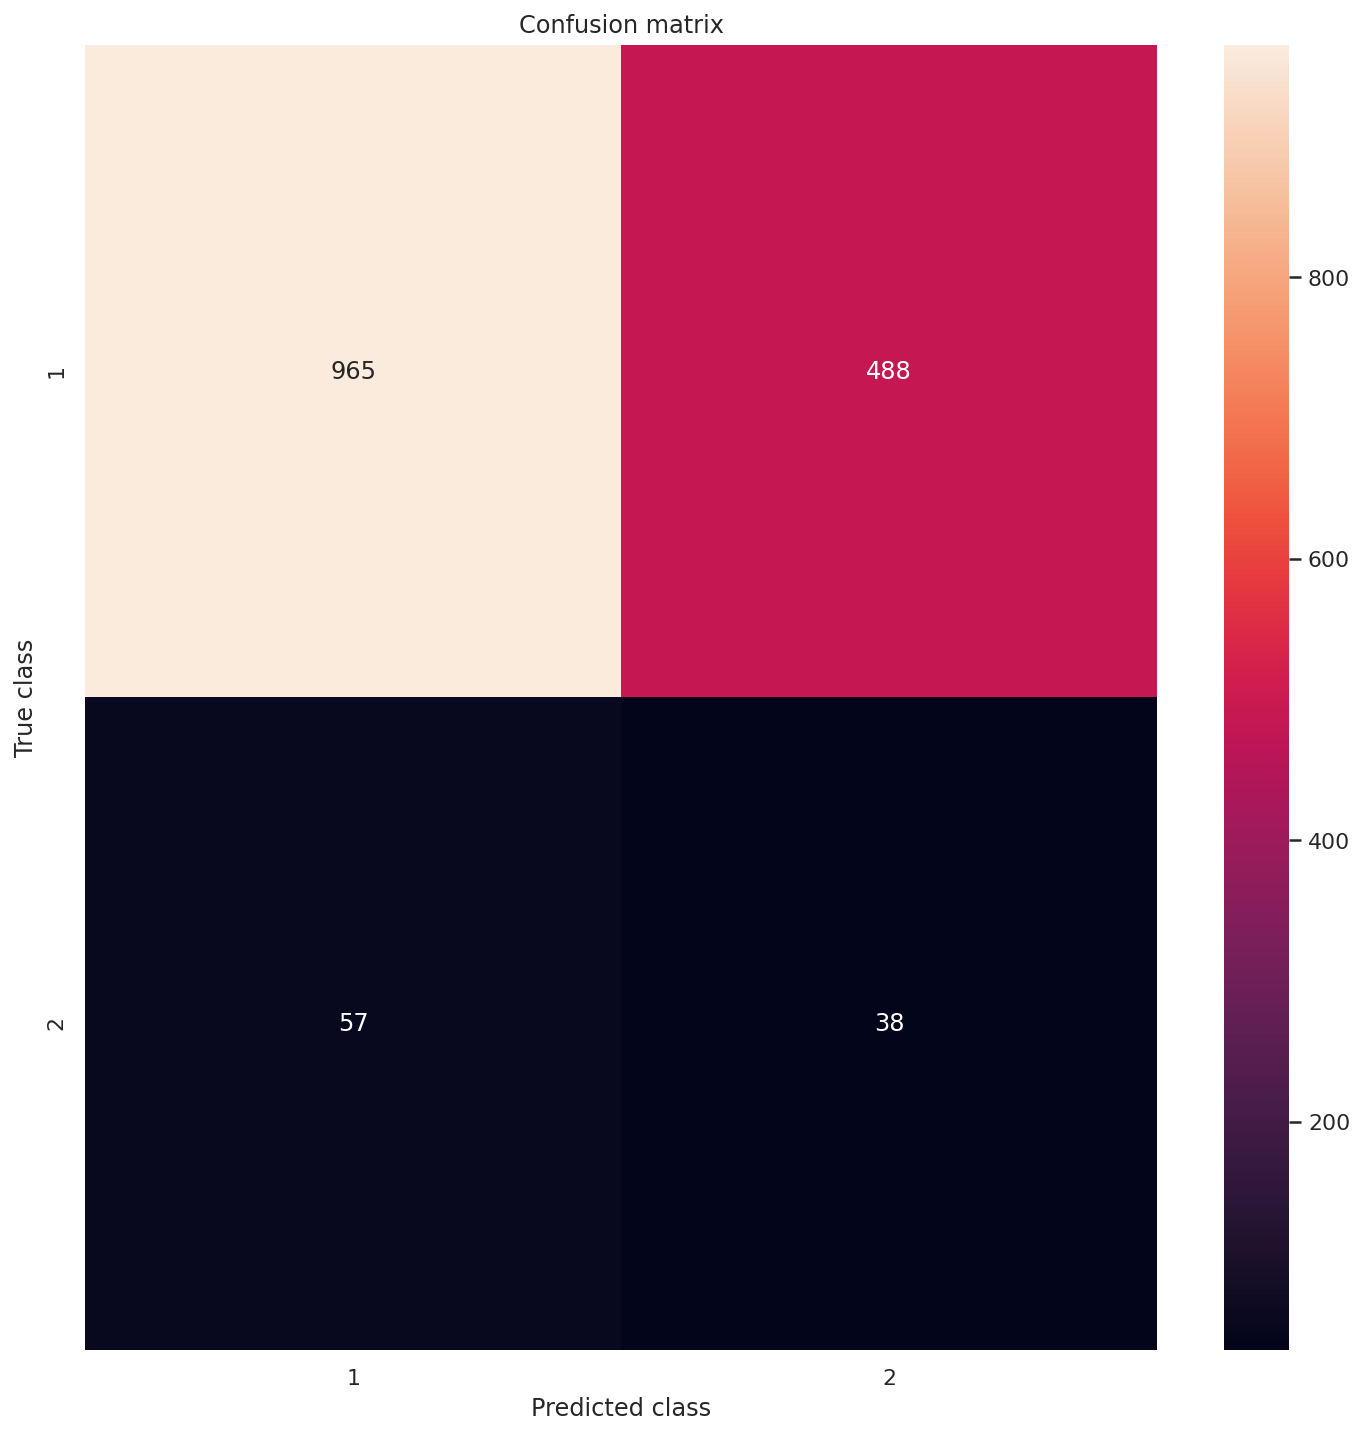

              precision    recall  f1-score   support

         1.0       0.94      0.66      0.78      1453
         2.0       0.07      0.40      0.12        95

    accuracy                           0.65      1548
   macro avg       0.51      0.53      0.45      1548
weighted avg       0.89      0.65      0.74      1548



In [40]:
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)